In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df=pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [4]:
df.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [5]:
x=df[['TV','Radio','Newspaper']]
y=df['Sales']

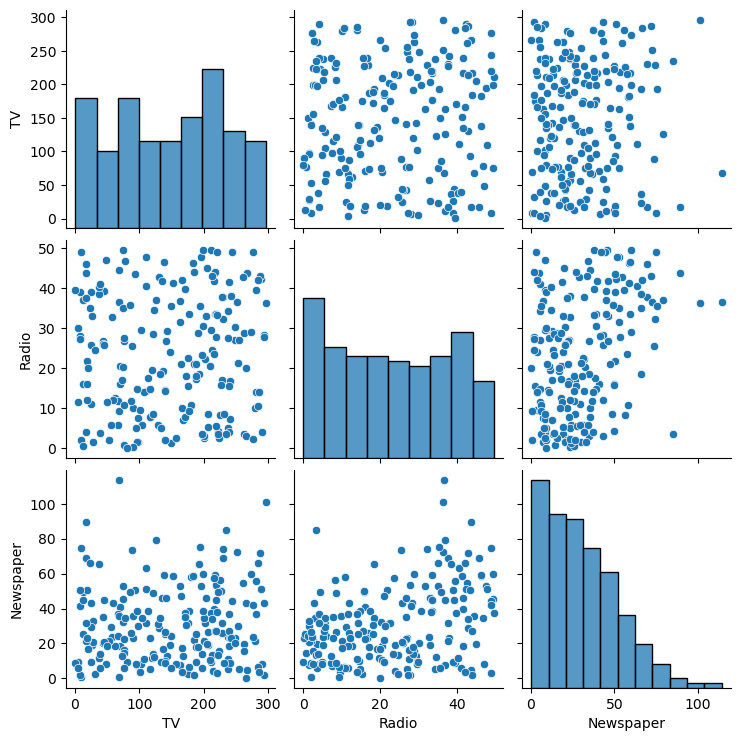

In [7]:
feature=df[['TV','Radio','Newspaper']]
sns.pairplot(feature)
plt.show()

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("x Training set:",x_train.shape)
print("x Testing set:",x_test.shape)
print("y Training set:",y_train.shape)
print("y Testing set:",y_test.shape)

x Training set: (160, 3)
x Testing set: (40, 3)
y Training set: (160,)
y Testing set: (40,)


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse_lin=mean_squared_error(y_test,y_pred)
mae_lin=mean_absolute_error(y_test,y_pred)
rmse_lin=np.sqrt(mse_lin)
print("Linear Regression:")
print("Mean Squared Error:",mse_lin)
print("Mean Absolute Error:",mae_lin)
print("Root Mean Squared Error:",rmse_lin)
print("R2 score:",r2_score(y_test,y_pred))

Mean Squared Error: 3.1740973539761046
Mean Absolute Error: 1.4607567168117606
Root Mean Squared Error: 1.7815996615334502
R2 Score: 0.899438024100912


In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
poly_model=Pipeline([('poly_features',PolynomialFeatures(degree=2)),('linear_regression',LinearRegression())])
poly_model.fit(x_train,y_train)
y_pred_poly=poly_model.predict(x_test)
mse_poly=mean_squared_error(y_test,y_pred_poly)
mae_poly=mean_absolute_error(y_test,y_pred_poly)
rmse_poly=np.sqrt(mse_poly)
print("Polynomial Regression (Degree 2):")
print("Mean Squared Error:",mse_poly)
print("Mean Absolute Error:",mae_poly)
print("Root Mean Squared Error:",rmse_poly)
print("R2 score:",r2_score(y_test,y_pred_poly))

Polynomial Regression (Degree 2):
Mean Squared Error: 0.4129102285379311
Mean Absolute Error: 0.5261794444043983
Root Mean Squared Error: 0.6425809120553855
R2 score: 0.9869181490609594


In [23]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
svr_model=Pipeline([('scaler',StandardScaler()),('svr',SVR(kernel='rbf'))])
svr_model.fit(x_train,y_train)
y_pred_svr=svr_model.predict(x_test)
mse_svr=mean_squared_error(y_test,y_pred_svr)
mae_svr=mean_absolute_error(y_test,y_pred_svr)
rmse_svr=np.sqrt(mse_svr)
print("Support Vector Regression(RBF Kernel):")
print("Mean Squared Error:",mse_svr)
print("Mean Absolute Error:",mae_svr)
print("Root Mean Squared Error:",rmse_svr)
print("R2 score:",r2_score(y_test,y_pred_svr))

Support Vector Regression(RBF Kernel):
Mean Squared Error: 2.8621091217425514
Mean Absolute Error: 1.1621388310185972
Root Mean Squared Error: 1.691776912522024
R2 score: 0.909322457245777


In [25]:
model=['Linear Regrssion','Polynomial Regression','SVR']
mse_value=[mse_lin,mse_poly,mse_svr]
mae_value=[mae_lin,mae_poly,mae_svr]
rmse_value=[rmse_lin,rmse_poly,rmse_svr]
a=np.arange(len(model))
width=0.25

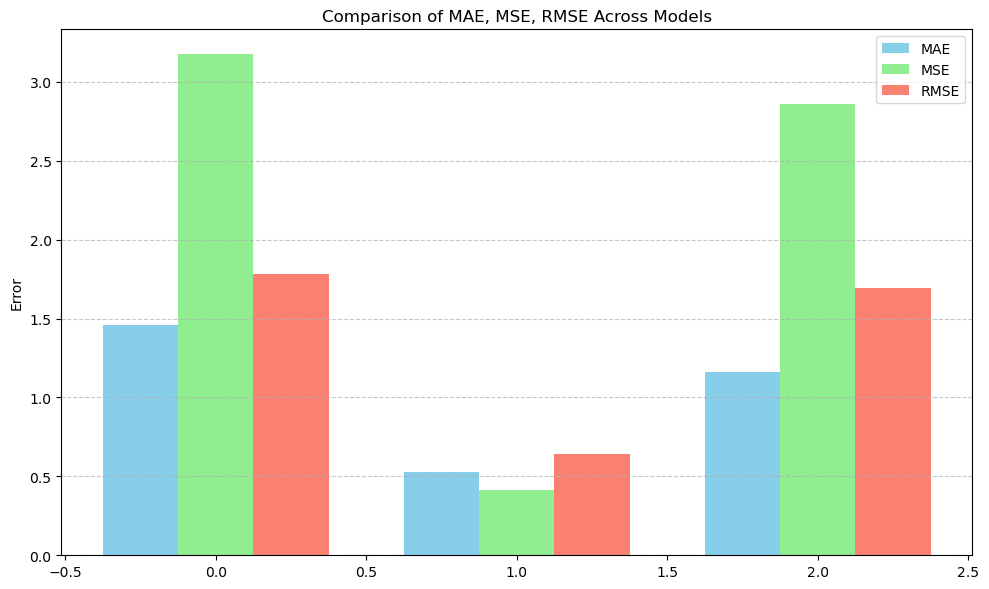

In [29]:
plt.figure(figsize=(10,6))
plt.bar(a-width,mae_value,width=width,label='MAE',color='skyblue')
plt.bar(a,mse_value,width=width,label='MSE',color='lightgreen')
plt.bar(a+width,rmse_value,width=width,label='RMSE',color='salmon')
plt.ylabel('Error')
plt.title('Comparison of MAE, MSE, RMSE Across Models')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [30]:
from sklearn.cluster import KMeans
ffclus=df[['TV','Radio','Newspaper','Sales']]
kmeans=KMeans(n_clusters=3,random_state=42)
df['Cluster']=kmeans.fit_predict(ffclus)

C:\Users\Hema\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Hema\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Hema\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Hema\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^